In [164]:
#cv2 is open-source library for the computer vision, machine learning, and image processing 
import cv2 
#NumPy is a basic level external library in Python used for complex mathematical operations
import numpy as np
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
from matplotlib import pyplot as plt
#Imutils are a series of convenience functions to make basic image processing functions such as translation, rotation,
#resizing, skeletonization, and displaying Matplotlib images
import imutils
#EasyOCR is a python package that allows the image to be converted to text
import easyocr

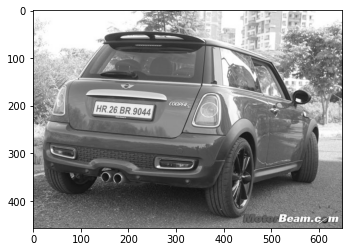

In [203]:
#Storing image in img
img = cv2.imread('Images/image1.jpg')
#converting image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

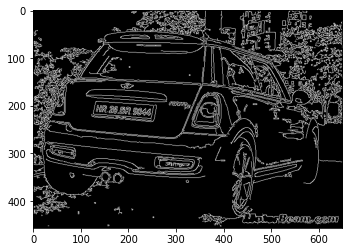

In [204]:
#applying filter to remove noise.
bfilter = cv2.bilateralFilter(gray,17,17,17)
#applying the edge setection by using canny.
#Here 150 is taken as lower thresold value and 200 is taken as upper thresold value
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [205]:
#finding the contor
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
#sorting contor on the basis of area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [206]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour ,10, True)
     #here the contour is calculated if the length is equal to 4
    if len(approx) == 4:
        location = approx
        break
print(location)       
        

[[[125 218]]

 [[247 227]]

 [[252 200]]

 [[132 191]]]


In [209]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

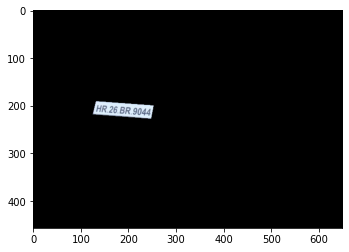

In [210]:
#imshow is method used to show image in windows
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [212]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

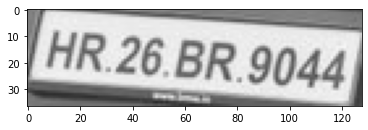

In [213]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))